<a href="https://colab.research.google.com/github/shilpashreshta/Data_Science_projects/blob/Employee_Attribution_Prediction/Employee_Attrition_V1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EMPLOYEE ATTRITION PREDICTION

In [ ]:
# Import Python Lybraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Loading the Employee attrition data by upload or refer next cell for github file read
from google.colab import files
files.upload()

##Read the data

In [ ]:
#Read the file into a dataframe
df= pd.read_csv(r'https://raw.githubusercontent.com/shilpashreshta/Data_Science_projects/refs/heads/Employee_Attribution_Prediction/Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [ ]:
#all columns not visible above, so ...
pd.set_option('display.max_columns',None)

##Exploratory Data Analysis

In [ ]:
#shape of data
df.shape

In [ ]:
#check if any columns have null values
df.isnull().any()

In [ ]:
#check if any column has single value entirely
uniq_val= {col: df[col].unique() for col in df.columns}
for col,values in uniq_val.items():
    print(f"{col},: ,{values}")

In [ ]:
#Drop the columns having single values entirely: EmployeeCount, StandardHours, Over18
df1=df.drop(['EmployeeCount','EmployeeNumber', 'StandardHours', 'Over18'],axis=1)

In [ ]:
#check for na values
df1.isna().sum()

In [ ]:
#check for null values
df1.isnull().sum()

In [ ]:
df1.info()

In [ ]:
#check for statistical details
df1.describe()

In [ ]:
#check for datatypes
#df1.select_dtypes(include='object').columns
for col in df1.columns:
  if df1[col].dtype==object:
    print(str(col)+': '+str(df1[col].unique()))
    print(df1[col].value_counts())
    print('--------------------------------------------------')


Attrition: ['Yes' 'No']
Attrition
No     1233
Yes     237
Name: count, dtype: int64
--------------------------------------------------
BusinessTravel: ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64
--------------------------------------------------
Department: ['Sales' 'Research & Development' 'Human Resources']
Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64
--------------------------------------------------
EducationField: ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64
--------------------------------------------------
Gender: ['Female' 'Male']
Gender
Male      882


In [ ]:
#check and drop duplicates if any
df1.drop_duplicates(inplace=True)

In [ ]:
#check if the data is balanced
df1['Attrition'].value_counts()

In [ ]:
#viewing the imbalance in the data
plt.figure(figsize=(5,2))
sns.countplot(y='Attrition',data=df1)

In [ ]:
# relation of Age with Attrition
plt.figure(figsize=(10,5))
sns.countplot(x='Age',hue='Attrition',data=df1)

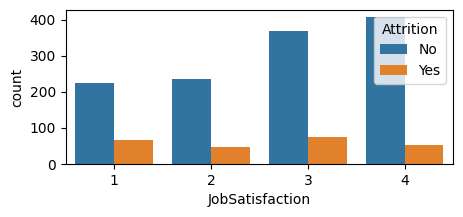

In [ ]:
# relation of JobSatisfaction with Attrition

plt.figure(figsize=(5,2))
sns.countplot(x='JobSatisfaction',hue='Attrition',data=df1)
plt.show()

<Axes: xlabel='DistanceFromHome', ylabel='count'>

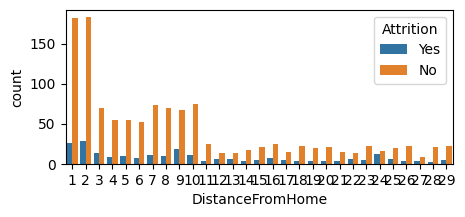

In [ ]:
# relation of DistanceFromHome with Attrition

plt.figure(figsize=(5,2))
sns.countplot(x='DistanceFromHome',hue='Attrition',data=df1)

In [ ]:
# relation of OverTime with Attrition seems strong

plt.figure(figsize=(5,2))
sns.countplot(x='OverTime',hue='Attrition',data=df1)

<Axes: xlabel='Gender', ylabel='count'>

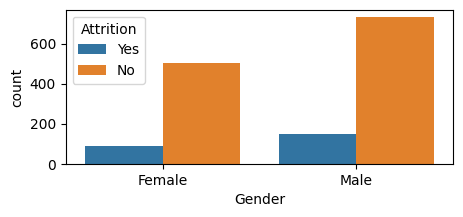

In [ ]:
# relation of Gender with Attrition seems unbiased

plt.figure(figsize=(5,2))
sns.countplot(x='Gender',hue='Attrition',data=df1)

<Axes: xlabel='JobLevel', ylabel='count'>

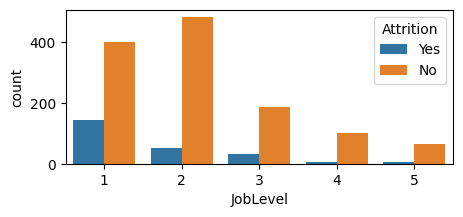

In [ ]:
# relation of JobLevel with Attrition seems direct

plt.figure(figsize=(5,2))
sns.countplot(x='JobLevel',hue='Attrition',data=df1)

<Axes: xlabel='TotalWorkingYears', ylabel='count'>

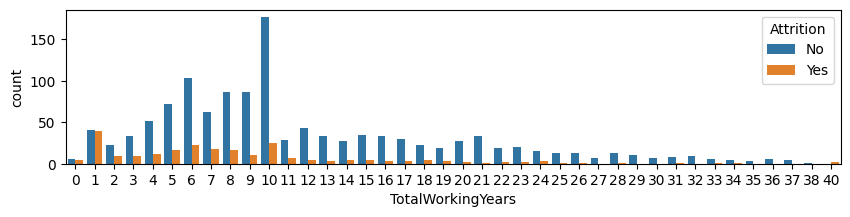

In [ ]:
# relation of TotalWorkingYears with Attrition

plt.figure(figsize=(10,2))
sns.countplot(x='TotalWorkingYears',hue='Attrition',data=df1)

<Axes: xlabel='MaritalStatus', ylabel='count'>

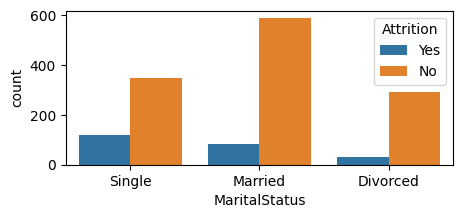

In [ ]:
# relation of MaritalStatus with Attrition

plt.figure(figsize=(5,2))
sns.countplot(x='MaritalStatus',hue='Attrition',data=df1)

<Axes: xlabel='PercentSalaryHike', ylabel='count'>

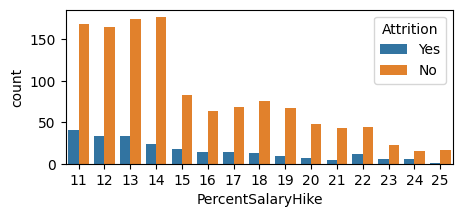

In [ ]:
# relation of PercentSalaryHike with Attrition seems direct

plt.figure(figsize=(5,2))
sns.countplot(x='PercentSalaryHike',hue='Attrition',data=df1)

<Axes: xlabel='MonthlyIncome', ylabel='count'>

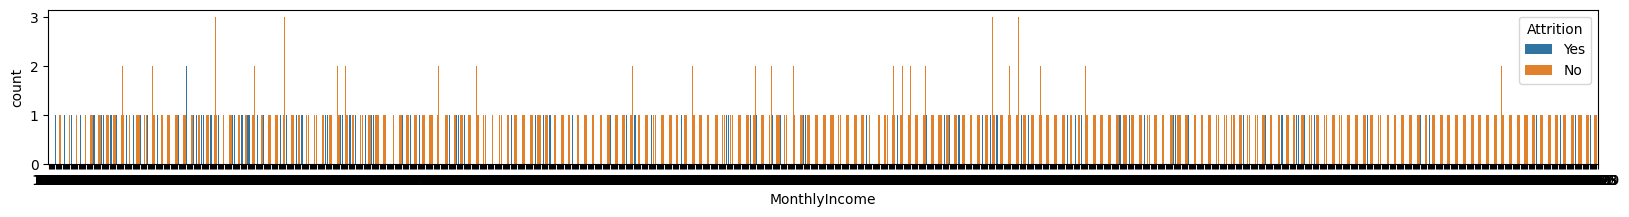

In [ ]:
# relation of MonthlyIncome with Attrition

plt.figure(figsize=(20,2))
sns.countplot(x='MonthlyIncome',hue='Attrition',data=df1)

In [ ]:
#correlation between features
plt.figure(figsize=(20,10))
num_df1= df1.select_dtypes(include='number')
sns.heatmap(num_df1.corr(),annot=True,cmap='coolwarm')

##Label Encoding

In [ ]:
#Target variable encoding
df1['Attrition']=df1['Attrition'].map({'Yes' :1,'No' :0})

In [ ]:
#Find the categorical columns
obj_col=df1.select_dtypes(include='object').columns
obj_col

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'OverTime'],
      dtype='object')

In [ ]:
# apply Label encoder to df_categorical
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()
for col in obj_col:
  df1[col]=encoder.fit_transform(df1[col])

In [ ]:
# Separate features (x) and target (y)
x = df1.drop('Attrition', axis=1)
y = df1['Attrition']

In [ ]:
# Find if there’s a linear relationship between the independent variables (features)
# and the log-odds of the dependent variable ('Attrition')

import statsmodels.api as sm

# Add a constant to the independent variables (required for statsmodels)
x = sm.add_constant(x)

# Fit the logistic regression model
logit_model = sm.Logit(y, x)
result = logit_model.fit()

# Print the summary of the model
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.318505
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              Attrition   No. Observations:                 1470
Model:                          Logit   Df Residuals:                     1439
Method:                           MLE   Df Model:                           30
Date:                Fri, 25 Oct 2024   Pseudo R-squ.:                  0.2789
Time:                        16:48:18   Log-Likelihood:                -468.20
converged:                       True   LL-Null:                       -649.29
Covariance Type:            nonrobust   LLR p-value:                 1.144e-58
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        2.8448      1.265      2.249      0.024       0.366


Conclusion from Logit model: Logistic Regression fits:
*   The model has identified several significant predictors of employee attrition, such as Age, DistanceFromHome, JobInvolvement, MaritalStatus, OverTime, and YearsSinceLastPromotion.
*   Some predictors, like OverTime and DistanceFromHome, have a strong influence on the likelihood of attrition.
*   The model shows a reasonable fit (pseudo R-squared of 0.2789),

## Splitting the data into training and testing

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.2,random_state=10)

## Apply RandomOverSampler to balance the training data

In [ ]:
from collections import Counter
from imblearn.over_sampling import RandomOverSampler

# Apply RandomOverSampler to balance the training data
ros= RandomOverSampler(random_state=10)
x_train_ros, y_train_ros= ros.fit_resample(x_train, y_train)

# Print the class distribution before and after oversampling
print("Class distribution before oversampling:", Counter(y_train))
print("Class distribution after oversampling:", Counter(y_train_ros))

##Scale the features

In [ ]:
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler= StandardScaler()
x_train_ros= scaler.fit_transform(x_train_ros)
x_test= scaler.transform(x_test)

In [ ]:
from sklearn.linear_model import LogisticRegression

# Train the logisticRegression model
model= LogisticRegression(max_iter=1000, random_state=42)
model.fit(x_train_ros, y_train_ros)

# Predict on test set
y_pred= model.predict(x_test)

Class distribution before oversampling: Counter({0: 994, 1: 182})
Class distribution after oversampling: Counter({0: 994, 1: 994})
[[188  51]
 [ 12  43]]
0.7857142857142857
              precision    recall  f1-score   support

           0       0.94      0.79      0.86       239
           1       0.46      0.78      0.58        55

    accuracy                           0.79       294
   macro avg       0.70      0.78      0.72       294
weighted avg       0.85      0.79      0.80       294



In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Evaluate the model
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

In [ ]:
# prompt: further tuning your logistic regression model, for instance by adjusting the threshold for classification or using regularization techniques (like L1/L2 regularization).

# ... (Your existing code)

# Further tuning: Adjusting classification threshold
from sklearn.metrics import roc_curve, auc

# Predict probabilities
y_probs = model.predict_proba(x_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Find optimal threshold based on Youden's J statistic
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print(f"Optimal threshold: {optimal_threshold}")

# Apply optimal threshold
y_pred_tuned = (y_probs >= optimal_threshold).astype(int)


# Evaluate the model with tuned threshold
print("Evaluation with tuned threshold:")
print(confusion_matrix(y_test, y_pred_tuned))
print(accuracy_score(y_test, y_pred_tuned))
print(classification_report(y_test, y_pred_tuned))


# Further tuning: L1 regularization
model_l1 = LogisticRegression(penalty='l1', solver='liblinear', C=0.1, max_iter=1000, random_state=42) # Adjust C for regularization strength
model_l1.fit(x_train_ros, y_train_ros)
y_pred_l1 = model_l1.predict(x_test)

print("\nEvaluation with L1 regularization:")
print(confusion_matrix(y_test, y_pred_l1))
print(accuracy_score(y_test, y_pred_l1))
print(classification_report(y_test, y_pred_l1))


# Further tuning: L2 regularization
model_l2 = LogisticRegression(penalty='l2', C=0.1, max_iter=1000, random_state=42)  # Adjust C
model_l2.fit(x_train_ros, y_train_ros)
y_pred_l2 = model_l2.predict(x_test)

print("\nEvaluation with L2 regularization:")
print(confusion_matrix(y_test, y_pred_l2))
print(accuracy_score(y_test, y_pred_l2))
print(classification_report(y_test, y_pred_l2))

Optimal threshold: 0.5140954944994794
Evaluation with tuned threshold:
[[191  48]
 [ 12  43]]
0.7959183673469388
              precision    recall  f1-score   support

           0       0.94      0.80      0.86       239
           1       0.47      0.78      0.59        55

    accuracy                           0.80       294
   macro avg       0.71      0.79      0.73       294
weighted avg       0.85      0.80      0.81       294


Evaluation with L1 regularization:
[[184  55]
 [ 12  43]]
0.7721088435374149
              precision    recall  f1-score   support

           0       0.94      0.77      0.85       239
           1       0.44      0.78      0.56        55

    accuracy                           0.77       294
   macro avg       0.69      0.78      0.70       294
weighted avg       0.85      0.77      0.79       294


Evaluation with L2 regularization:
[[186  53]
 [ 13  42]]
0.7755102040816326
              precision    recall  f1-score   support

           0       0.9

##Tuned Threshold (0.5141): Achieves the highest accuracy (80%), precision (0.47), and F1-score (0.59) for the minority class. The recall remains high (0.78).

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import